In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [9]:
df = pd.read_csv("/content/ionic_resistance.csv")

In [10]:
df = df.sort_values('TEMP')
print(df)

    YSZ_COMP   N2   H2  TEMP  IONIC_RESISTANCE
41      8.00    0  100   600              10.3
3       7.75   50   50   600               5.1
6       8.25   50   50   600               2.3
0       7.25    0  100   700               1.1
22      8.75   50   50   700               1.6
23      8.75   50   50   700               1.6
25      7.25  100    0   700               6.1
26      7.25   50   50   700               2.3
28      7.75  100    0   700              11.1
29      7.75  100    0   700               2.2
33      8.25   50   50   700               2.8
42      8.00    0  100   700               3.7
34      8.25   50   50   700               3.6
37      8.75  100    0   700               4.4
38      8.75   50   50   700               1.6
39      8.75   50   50   700               1.7
30      7.75   50   50   700               2.1
19      8.25   50   50   700               3.6
21      8.75  100    0   700               4.4
1       7.25   50   50   700               1.1
15      7.75 

**Running linear regression on data**

In [11]:
predictors = df[['N2','H2','YSZ_COMP','TEMP']]
response = df["IONIC_RESISTANCE"]

model = sm.OLS(response,predictors).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       IONIC_RESISTANCE   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9871
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.409
Time:                        23:15:23   Log-Likelihood:                -116.51
No. Observations:                  44   AIC:                             241.0
Df Residuals:                      40   BIC:                             248.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N2            -0.1416      0.125     -1.137      0.2

**Creating box plots for each temperature**

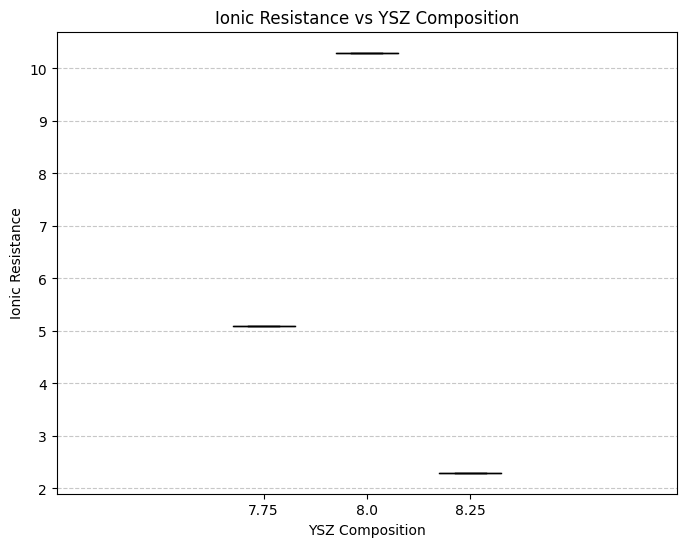

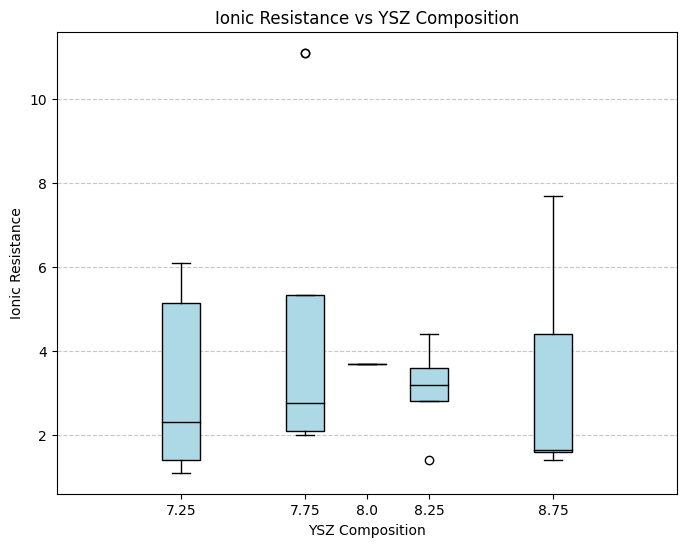

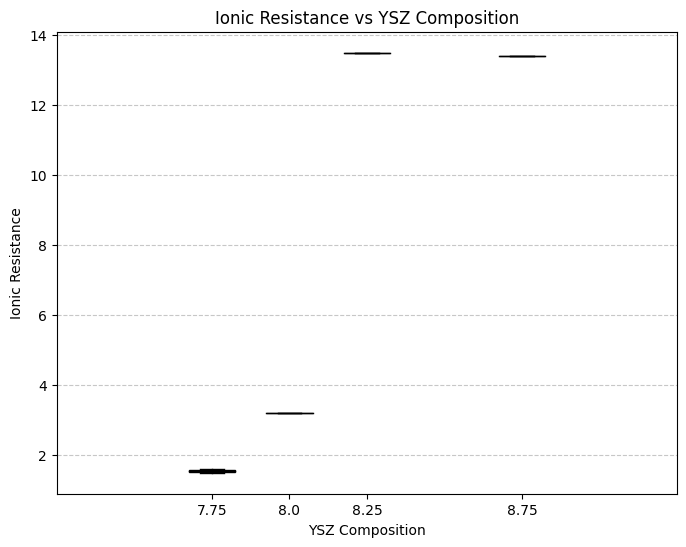

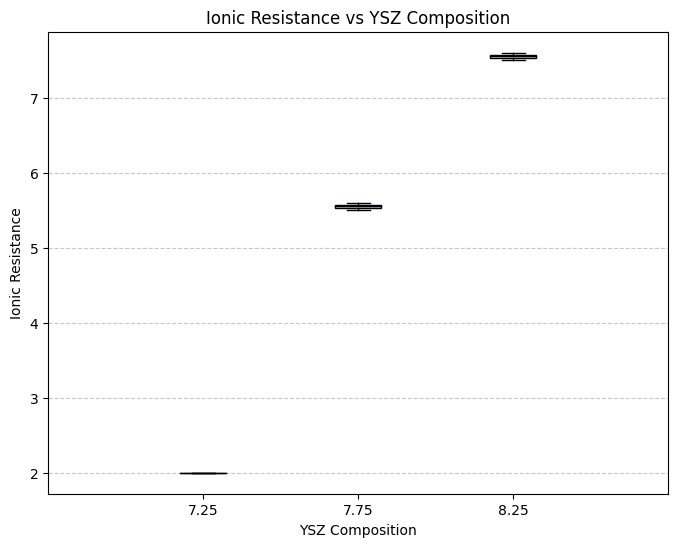

In [12]:
temp600 = df[df['TEMP'] == 600]
temp700 = df[df['TEMP'] == 700]
temp750 = df[df['TEMP'] == 750]
temp800 = df[df['TEMP'] == 800]

for tempdf in [temp600,temp700,temp750,temp800]:
  fig, ax = plt.subplots(figsize=(8, 6))
  for comp in tempdf['YSZ_COMP'].unique():
      data = tempdf[tempdf['YSZ_COMP'] == comp]['IONIC_RESISTANCE']

      boxplot = ax.boxplot(data, positions=[comp], labels=[comp], patch_artist=True, medianprops={'color': 'black'}, boxprops=dict(facecolor='lightblue', color='black'))

  ax.set_xlabel('YSZ Composition')
  ax.set_ylabel('Ionic Resistance')
  ax.set_title('Ionic Resistance vs YSZ Composition')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  plt.show()